# Example showing the basic usage of the orographic precipitation model

Import relevant functions to compute orographic precipitation, set up a topography and plot the resulting precipitation matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from orographic_precipitation import compute_orographic_precip

Create example topography, for instance, an isolated circular Gaussian hill (see [Smith & Barstad](https://journals.ametsoc.org/view/journals/atsc/61/12/1520-0469_2004_061_1377_altoop_2.0.co_2.xml), Fig. 4 a-c).

In [2]:
def gauss_topography(dx, dy):
    """Returns synthetic topography for testing.
    Analogous to Fig 4 in Smith and Barstedt, 2004.
    """
    h_max = 500.
    x0 = -25e3
    y0 = 0
    sigma_x = sigma_y = 15e3
    
    x, y = np.arange(-100e3, 200e3, dx), np.arange(-150e3, 150e3, dy)
    X, Y = np.meshgrid(x, y)
    
    h = (h_max *
       np.exp(-(((X - x0)**2 / (2 * sigma_x**2)) +
                ((Y - y0)**2 / (2 * sigma_y**2)))))
    
    return X, Y, h

In [3]:
def plot2d(X, Y, field):
    """Function that plots precipitation matrices"""
    fig, ax = plt.subplots(figsize=(6, 6))
    pc = ax.pcolormesh(X, Y, field)
    ax.set_aspect(1)
    fig.colorbar(pc)

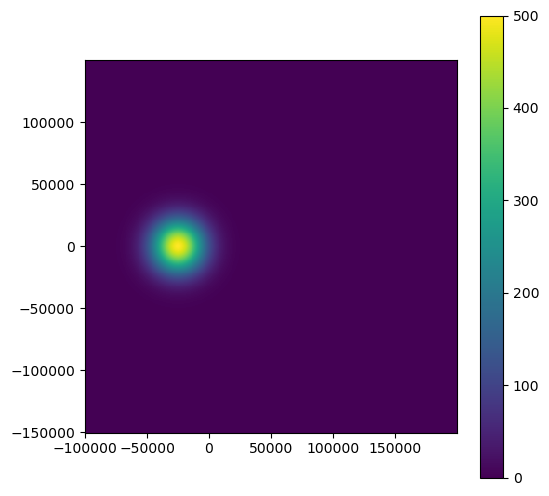

In [4]:
dx = 750.
dy = 750.

X, Y, elevation = gauss_topography(dx, dy)

plot2d(X, Y, elevation)

Initialize dictionary with relevant parameters, compute and plot orographic precipitation.

In [6]:
lapse_rate = -5.8
lapse_rate_m = -6.5
ref_density = 7.4e-3

param = {
'latitude': 40,                   # latitude
'precip_base': 7,                 # background non-orographic precipitation rate
'precip_min': 0.001,              # minimum precipitation rate
'wind_speed': 10,                 # wind speed
'wind_dir': 270,                  # wind direction (270: west)
'conv_time': 1000,                # conversion time
'fall_time': 1000,                # fallout time
'nm': 0.005,                      # moist stability frequency
'hw': 5000,                       # water vapor scale height
'cw': ref_density * lapse_rate_m / lapse_rate   # uplift sensitivity
}

P = compute_orographic_precip(elevation, dx, dy, **param)

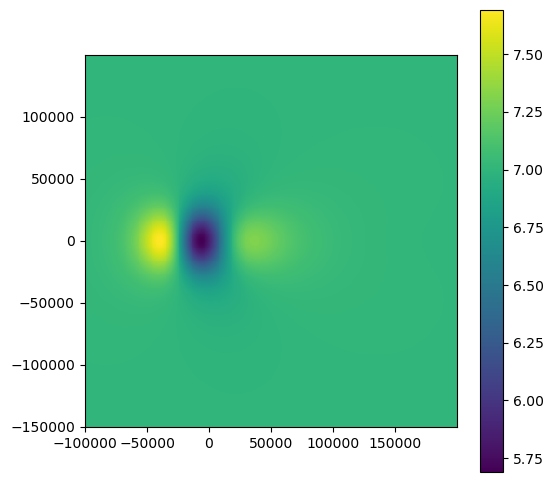

In [7]:
plot2d(X, Y, P)